載入套件

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import datasets
import pandas as pd
from sklearn.manifold import MDS
import numpy as np
from sklearn.neighbors import NearestNeighbors 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE

載入資料，並將像似矩陣轉為距離矩陣

In [2]:
D = pd.read_csv("../R-scripts/combined_matrix_symbols.csv", index_col=0)


def replace_with_one_minus_x(x):
    return 1 - x

D = D.fillna(0)
D_transformed = D.applymap(replace_with_one_minus_x)

# 打印替换NaN值后的数据
print(D_transformed)

          ABL1  ACOT11  ACOT7  ACTN2  ACVR1  ADAM19  ADAMTS12  ADAMTS16  \
ABL1     0.000   0.912  0.531  0.415  0.335   0.470     0.488     0.742   
ACOT11   0.912   0.000  0.430  0.912  0.904   0.846     0.838     0.831   
ACOT7    0.531   0.430  0.000  0.467  0.515   0.561     0.558     0.777   
ACTN2    0.415   0.912  0.467  0.000  0.468   0.390     0.375     0.709   
ACVR1    0.335   0.904  0.515  0.468  0.000   0.494     0.488     0.695   
...        ...     ...    ...    ...    ...     ...       ...       ...   
TMEM196  0.531   0.573  0.573  0.313  0.313   0.313     0.457     0.457   
VOPP1    0.608   0.589  0.566  0.660  0.693   0.636     0.718     0.718   
KLHL35   0.000   0.872  0.000  0.000  0.000   0.000     0.000     0.643   
MPPED2   0.465   0.781  0.460  0.434  0.496   0.474     0.449     0.605   
PRR15    0.000   0.872  0.000  0.000  0.000   0.000     0.000     0.643   

         ADAMTS20  ADCYAP1  ...   NOL4   PLD5  RALYL  SPHKAP  TMEM132D  \
ABL1        0.798    0.51

進行DBSCAN 聚類，為後續可視化資料進行MDS降維，儲存聚類特徵分類檔

In [3]:
clustering = DBSCAN(eps=0.1, min_samples=40, metric='precomputed').fit(D_transformed)
print(clustering.labels_)

D_array = D_transformed.values

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
D_2d = mds.fit_transform(D_array)

cluster_centers = np.array([np.mean(D_2d[clustering.labels_ == label], axis=0) for label in set(clustering.labels_)])

features = D.index.values

# 將特徵和分類結果組合成 DataFrame
result_df = pd.DataFrame({'Feature': features, 'Cluster': clustering.labels_})

result_df.to_csv("../result/dbscan_group.csv",index=False)

[ 0 -1  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1 -1  0
  0  0  0  0  0 -1  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0 -1  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0
  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1

計算SC、DBI、CH 之不同指標分數，並輸出於終端機

In [4]:
silhouette = silhouette_score(D_transformed, clustering.labels_, metric='precomputed')
print(f"Silhouette Coefficient: {silhouette},\n取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠\n")

dbi = davies_bouldin_score(D_transformed, clustering.labels_)
print(f"Davies-Bouldin Index: {dbi},\n值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散\n")

ch = calinski_harabasz_score(D_transformed, clustering.labels_)
print(f"Calinski-Harabasz Index: {ch},\n類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好\n")

Silhouette Coefficient: 0.2010742508219012,
取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠

Davies-Bouldin Index: 1.8961479211299677,
值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散

Calinski-Harabasz Index: 50.06344322808367,
類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好



產生可視化圖片

NameError: name 'D_array' is not defined

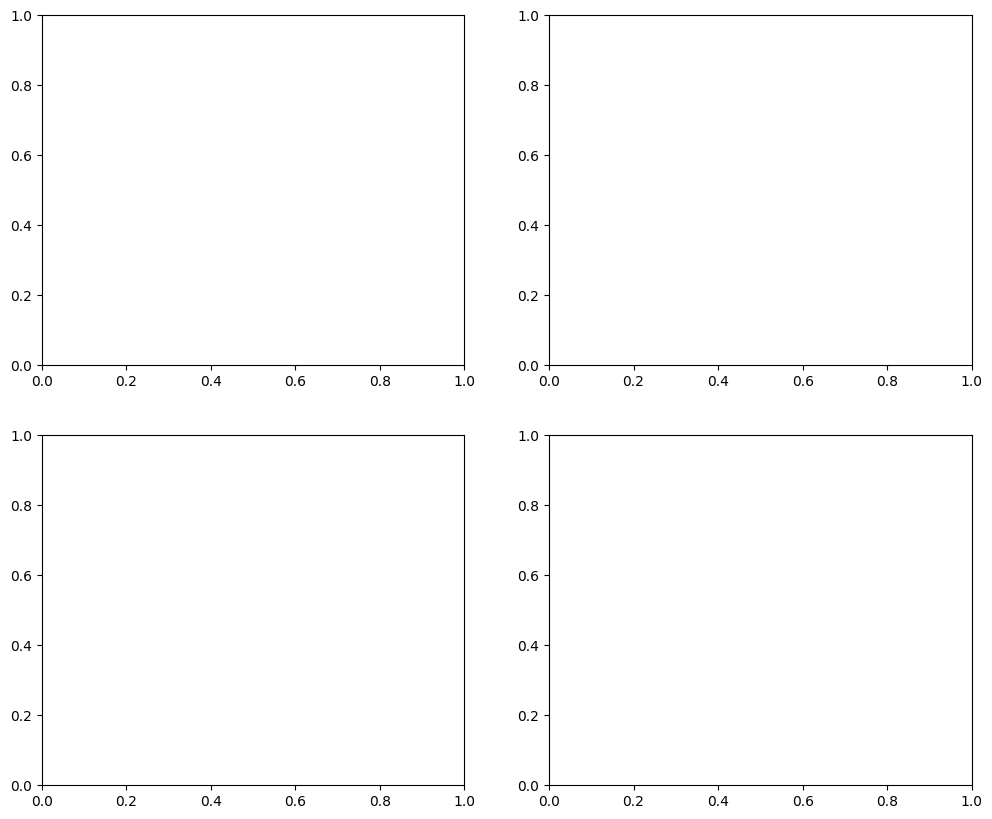

In [5]:

fig, axs = plt.subplots(2,2,figsize=(12, 10))

# 第一張子圖：DBSCAN聚類結果
axs[0,0].scatter(D_array[:, 0], D_array[:, 1], c=clustering.labels_, s=30)
axs[0,0].set_title('DBSCAN Clustering')

# 第二張子圖：原始數據的MDS降維結果
axs[0,1].scatter(D_2d[:, 0], D_2d[:, 1], c=clustering.labels_, s=30)
axs[0,1].set_title('MDS Visualization')

# # 第三張子圖：群集中心
# axs[1, 0].scatter(D_2d[:, 0], D_2d[:, 1], c=clustering.labels_, s=30)
# axs[1, 0].set_title('Cluster Centers')

# 第四張子圖：使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(D)

# 可視化聚类結果
axs[1, 1].scatter(X_2d[:, 0], X_2d[:, 1], c=clustering.labels_, cmap='viridis', s=30)
axs[1, 1].set_title('t-SNE Visualization of DBSCAN Clustering')

# 調整子圖間距
plt.tight_layout()

# 顯示畫布
plt.show()